This notebook will cover 1. visual representations of mean exertion and success/failure at each target level  during the association phase, and whether there is any effect of treatment on being able to reach the required targets. In other words, are participants less likely to be able to reach and sustain the target force when not medicated? Second, is there any difference in the variability in force production in the absence of medication? 

In [1]:
#Import the necessary libraries. 
% matplotlib inline

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
#EXtract the file with the association data and store in a dataframe. 
rootpath = "E:\Thesis work\Pendrive\Risk preferences in PD\Effort choices\Analysis"
filename = "AssocPhase.csv"
assoc = pd.read_csv(os.path.join(rootpath,filename))

In [5]:
assoc.head()

,T,O,MVC,SID,TREAT,TrialNum,M,S,SDN
0,60,0,0.456985,1,1,1,47.698662,11.695090,0.245187
1,60,1,0.456985,1,1,2,56.129415,10.423609,0.185707
2,60,0,0.456985,1,1,3,57.327787,3.342513,0.058305
3,60,1,0.456985,1,1,4,58.241509,1.663777,0.028567
4,60,1,0.456985,1,1,5,58.143234,1.150266,0.019783


In [13]:
outcome_bysub = assoc.groupby(['TREAT','SID']).mean()
outcome = outcome_bysub['O'].groupby('TREAT').agg(['mean','std'])
outcome['sem'] = outcome['std']/np.sqrt(assoc['SID'].unique().shape[0])
outcome.loc[1,:]
outcome_bysub.head()

T      O       MVC  TrialNum          M         S       SDN
TREAT SID                                                                
1     1    45.0  0.825  0.456985      20.5  43.699024  6.243690  0.161378
      2    45.0  1.000  0.725306      20.5  43.615576  6.452306  0.161677
      3    45.0  0.750  0.821734      20.5  42.752141  6.047384  0.164083
      4    45.0  0.975  0.872044      20.5  42.033746  5.916771  0.152614
      5    45.0  0.875  0.712729      20.5  42.869475  7.347279  0.193163

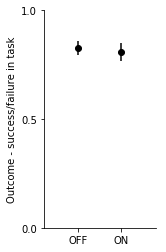

In [60]:
fig,ax=plt.subplots(figsize=[2,4])
plt.scatter([1,1.25],outcome['mean'],c='k')
plt.errorbar([1,1.25],outcome['mean'],yerr=outcome['sem'],fmt='none',ecolor='k')
plt.xlim([0.8,1.45])
plt.xticks([1,1.25],['OFF','ON'])
plt.ylim([0,1])
plt.yticks(np.arange(0,1.01,step=0.5))
plt.ylabel('Outcome - success/failure in task')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Text(0.5,0,'Difference in outcome OFF-ON')

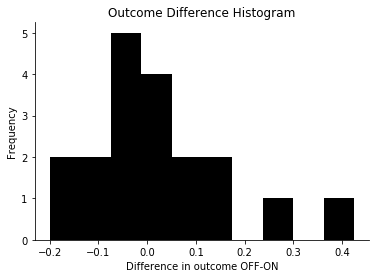

In [29]:
#Plotting a Q-Q plot to check for normality of outcome data. 
#outcome_diff = outcome_bysub.loc[outcome_bysub.index.get_level_values(0).unique()[0],'O'] - outcome_bysub.loc[outcome_bysub.index.get_level_values(0).unique()[1],'O']

outcome_diff = outcome_bysub.loc[1,'O'] - outcome_bysub.loc[2,'O']
#outcome_bysub.loc[1,'O']

fig,ax=plt.subplots()
outcome_diff.plot(kind='hist', title= 'Outcome Difference Histogram',color='k');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Difference in outcome OFF-ON');

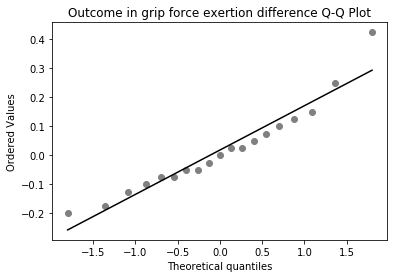

In [38]:
#Test of normality using a Q-Q plot
fig,ax=plt.subplots()
stats.probplot(outcome_diff, plot= plt)
plt.title('Outcome in grip force exertion difference Q-Q Plot');
ax.get_lines()[0].set_markerfacecolor((0.5,0.5,0.5))
ax.get_lines()[0].set_markeredgecolor((0.5,0.5,0.5))
ax.get_lines()[1].set_color('k')

In [64]:
#Final quantitative test of normality using a Wilk-Shapiro test
stats.shapiro(outcome_diff)

(0.9372233152389526, 0.23488105833530426)

In [39]:
stats.ttest_rel(outcome_bysub.loc[1,'O'],outcome_bysub.loc[2,'O'])

Ttest_relResult(statistic=0.5337881009488558, pvalue=0.6000187412685416)

We tested differences in overall outcome. There are no effects of treatment on overall success, failure of the task. 
Next, we want to determine if there are any treatment effects on specific targets. We will determine this by fist created a grouped table of outcomes, mean exertion and deviation by treatment, for each subject for each target level.  

In [93]:
outcome_bysub_byT = assoc.groupby(['TREAT','SID','T']).mean()
outcome_bysub_byT.head()

O       MVC  TrialNum          M         S       SDN
TREAT SID T                                                         
1     1   10  0.8  0.456985       8.0  12.705177  3.198895  0.249352
          20  0.8  0.456985      28.0  20.926525  2.948913  0.148018
          30  1.0  0.456985      38.0  29.388230  5.655588  0.194428
          40  1.0  0.456985      18.0  39.100795  6.788741  0.174387
          50  0.8  0.456985      33.0  47.817692  7.936078  0.167377

In [70]:
outcome_byT = outcome_bysub_byT.groupby(['TREAT','T']).agg(['mean','std'])
outcome_byT.head()

O                 MVC             TrialNum             \
              mean       std      mean       std       mean        std   
TREAT T                                                                  
1     10  0.936842  0.134208  0.933608  0.342575  23.000000  11.303883   
      20  0.936842  0.149854  0.933608  0.342575  19.052632  11.002392   
      30  0.936842  0.134208  0.933608  0.342575  22.210526  12.501462   
      40  0.926316  0.099119  0.933608  0.342575  18.263158  10.202626   
      50  0.831579  0.251777  0.933608  0.342575  22.210526  11.212983   

                  M                   S                 SDN            
               mean       std      mean       std      mean       std  
TREAT T                                                                
1     10  11.103989  2.939820  2.733745  0.898055  0.247253  0.062578  
      20  19.402316  1.541604  3.701604  1.037719  0.192778  0.057906  
      30  28.814941  1.300900  4.494296  1.322334  0.158329  0.052854  
      40  38.302438  1.160228  6.033523  1.129506  0.158055  0.029382  
      50  47.325430  1.857380  6.835811  2.028261  0.146768  0.046862

In [72]:
outcome_byT.drop(['TrialNum','MVC'],axis=1,inplace=True)
outcome_byT.columns = ['_'.join(col).strip() for col in outcome_byT.columns.values]

In [74]:
outcome_byT.head()

O_mean     O_std     M_mean     M_std    S_mean     S_std  \
TREAT T                                                                 
1     10  0.936842  0.134208  11.103989  2.939820  2.733745  0.898055   
      20  0.936842  0.149854  19.402316  1.541604  3.701604  1.037719   
      30  0.936842  0.134208  28.814941  1.300900  4.494296  1.322334   
      40  0.926316  0.099119  38.302438  1.160228  6.033523  1.129506   
      50  0.831579  0.251777  47.325430  1.857380  6.835811  2.028261   

          SDN_mean   SDN_std  
TREAT T                       
1     10  0.247253  0.062578  
      20  0.192778  0.057906  
      30  0.158329  0.052854  
      40  0.158055  0.029382  
      50  0.146768  0.046862

In [75]:
outcome_byT['O_sem'] = outcome_byT['O_std']/np.sqrt(len(assoc['SID'].unique()))


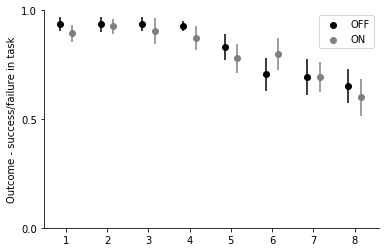

In [76]:
fig,ax=plt.subplots()
plt.scatter(np.arange(1,9)-0.15,outcome_byT.loc[1,'O_mean'],c='k',label='OFF')
plt.scatter(np.arange(1,9)+0.15,outcome_byT.loc[2,'O_mean'],c=(0.5,0.5,0.5),label='ON')
ax.legend();
plt.errorbar(np.arange(1,9)-0.15,outcome_byT.loc[1,'O_mean'],yerr=outcome_byT.loc[1,'O_sem'],fmt='none',ecolor='k')
plt.errorbar(np.arange(1,9)+0.15,outcome_byT.loc[2,'O_mean'],yerr=outcome_byT.loc[2,'O_sem'],fmt='none',ecolor= (0.5,0.5,0.5))
#plt.xlim([0.8,1.45])
#plt.xticks([1,1.25],['OFF','ON'])
plt.ylim([0,1])
plt.yticks(np.arange(0,1.01,step=0.5))
plt.ylabel('Outcome - success/failure in task')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [80]:
outcome_diff_byT=outcome_bysub_byT.loc[1,'O']-outcome_bysub_byT.loc[2,'O']

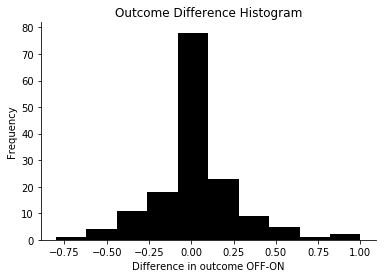

In [82]:
fig,ax=plt.subplots()
outcome_diff_byT.plot(kind='hist', title= 'Outcome Difference Histogram',color='k');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Difference in outcome OFF-ON');

In [94]:
outcome_bysub_byT.reset_index(inplace=True)
outcome_bysub_byT.loc[:,['TREAT','SID']] = outcome_bysub_byT.loc[:,['TREAT','SID']].astype('category')


In [95]:
outcome_bysub_byT.head()

,TREAT,SID,T,O,MVC,TrialNum,M,S,SDN
0,1,1,10,0.8,0.456985,8.0,12.705177,3.198895,0.249352
1,1,1,20,0.8,0.456985,28.0,20.926525,2.948913,0.148018
2,1,1,30,1.0,0.456985,38.0,29.388230,5.655588,0.194428
3,1,1,40,1.0,0.456985,18.0,39.100795,6.788741,0.174387
4,1,1,50,0.8,0.456985,33.0,47.817692,7.936078,0.167377


In [ ]:
#Determining if there's any effect of target and treatment on outcome using a 2-way ANOVA
formula = 'O ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)